In [0]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip,math,torch,matplotlib as mpl
from torch import tensor
import matplotlib.pyplot as plt
mnist_url='http://deeplearning.net/data/mnist/mnist.pkl'

In [2]:
path=datasets.download_data(mnist_url,ext='.gz');path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:
with gzip.open(path,'rb') as f:
  ((X_train,y_train),(X_test,y_test),_)=pickle.load(f,encoding='latin-1')

In [0]:
X_train,y_train,X_test,y_test=map(tensor,(X_train,y_train,X_test,y_test))
r,c=X_train.shape


In [0]:
assert r==y_train.shape[0]==50000


In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
img=X_train[0]

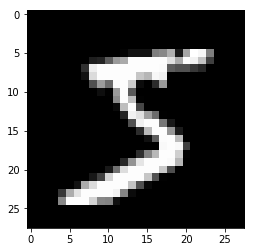

In [8]:
plt.imshow(img.view(28,28))

Neural net


In [0]:
weight=torch.randn(784,10)
bias=torch.randn(10)

**Matrix multiplication**

In [0]:
def matmul(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)
  for i in range(ar):
    for j in range(bc):
      for k in range(br):
        c[i,j]+= a[i,k]*b[k,j]
        
  return c      

In [0]:
m1=X_test[:5]
m2=weight

In [21]:
%time matmul(m1,m2)

CPU times: user 959 ms, sys: 984 µs, total: 960 ms
Wall time: 976 ms


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2349,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5542,  -0.1604,  -4.3945,  -5.4458,   7.1246,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]])

**Elementwise operations**

In [0]:
def matmul1(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)
  for i in range(ar):
    for j in range(bc):
      c[i,j]=(a[i]*b[:,j]).sum()
  
  return c

In [23]:
%time matmul1(m1,m2)

CPU times: user 1.79 ms, sys: 0 ns, total: 1.79 ms
Wall time: 1.79 ms


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2348,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5542,  -0.1604,  -4.3945,  -5.4458,   7.1246,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]])

**Broadcasting**


In [0]:
def matmul2(a,b):
  ar,ac=a.shape
  br,bc=b.shape
  assert ac==br
  c=torch.zeros(ar,bc)
  for i in range(ar):
    c[i]=(a[i].unsqueeze(-1)*b).sum(dim=0)
    
  return c  
    

In [27]:
%time matmul2(m1,m2)

CPU times: user 0 ns, sys: 938 µs, total: 938 µs
Wall time: 945 µs


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2349,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5542,  -0.1604,  -4.3945,  -5.4458,   7.1246,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]])

**Einstein** **summation**

In [0]:
def matmul3(a,b):
  return torch.einsum('ik,kj->ij',a,b)


In [40]:
%time matmul3(m1,m2)

CPU times: user 775 µs, sys: 0 ns, total: 775 µs
Wall time: 464 µs


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2349,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5543,  -0.1604,  -4.3945,  -5.4458,   7.1246,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]])

**PyTorch matrix multiplication**


In [41]:
%time m1.matmul(m2)

CPU times: user 555 µs, sys: 0 ns, total: 555 µs
Wall time: 369 µs


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2349,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5543,  -0.1604,  -4.3945,  -5.4458,   7.1246,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]])

In [0]:
m3,m4  = m1.cuda(),m2.cuda()

In [45]:
%time m3.matmul(m4)

CPU times: user 0 ns, sys: 494 µs, total: 494 µs
Wall time: 275 µs


tensor([[  5.0123,  20.5425,   2.7420,  -5.8743,  -6.6065,   8.0194,  -8.1597,
           3.3932,   7.5767,   7.2117],
        [  8.8300,  15.6637,   0.0930,  -1.0178,  -1.3674,   5.7636,  -4.2349,
           2.6263,   3.0513,  13.7753],
        [ 15.0146,  17.7040,  11.0551,  10.8203,  -5.2706,   4.7759,   0.2618,
           8.3086,  -4.6078,   6.9462],
        [  2.1264,  14.5542,  -0.1604,  -4.3945,  -5.4458,   7.1245,  -3.0338,
          -2.4407,   3.6220,  -6.5276],
        [  6.6812,  23.1065,   5.0122,   2.0833, -15.4126,  13.2852,  -2.3363,
           2.2350, -15.7016,  -6.4366]], device='cuda:0')

Normal matrix multiplication-976 ms
Elementwise ops-1.79 ms
Broadcasting-945 us
Einstein summation-464 us (can be improved)
Pytorch-369 us
with cuda-275 us